In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Amir\Desktop\Book2 (2) (1).csv")
df.drop(['education', "gender"], axis=1, inplace=True)
df_cleaned = df.dropna()

for col in ["id_num", "A1", "A2-5", "A6", "DR"]:
    df_cleaned[col] = df_cleaned[col].astype(int)

C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3673539920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(int)
C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3673539920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].astype(int)
C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3673539920.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [2]:
AD_MC_UN = df_cleaned["AD/MCI"].unique()
ad_l = ['AD','Ad','aD', 'ad']
mci_l = [x for x in AD_MC_UN if x not in ad_l]

# Replace AD with 1 and MCI with 0
df_cleaned['AD/MCI'] = df_cleaned['AD/MCI'].replace(ad_l, 1) 
df_cleaned['AD/MCI'] = df_cleaned['AD/MCI'].replace(mci_l, 0)

C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3271128130.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AD/MCI'] = df_cleaned['AD/MCI'].replace(ad_l, 1)
C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3271128130.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned['AD/MCI'] = df_cleaned['AD/MCI'].replace(mci_l, 0)
C:\Users\Amir\AppData\Local\Temp\ipykernel_9852\3271128130.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [3]:
features = df_cleaned.columns.to_list()

for col in ['id_num', 'R-hyppo', 'L-hyppo']:
    features.remove(col)

targets = ['R-hyppo', 'L-hyppo']

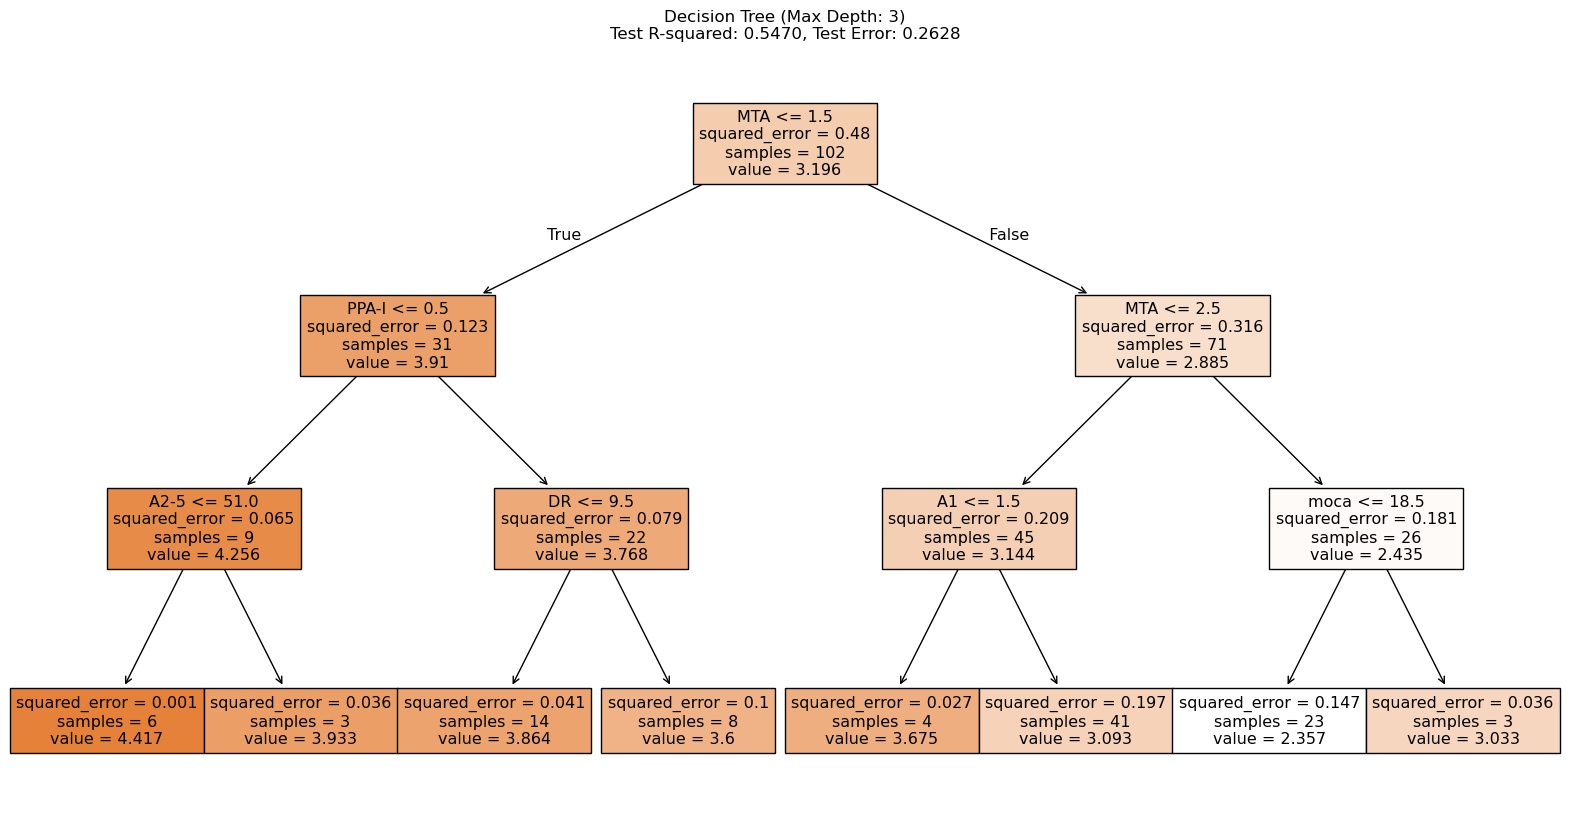

1: MTA (Importance: 0.8661)
2: PPA-I (Importance: 0.0424)
3: A1 (Importance: 0.0345)
4: moca (Importance: 0.0340)
5: A2-5 (Importance: 0.0131)
6: DR (Importance: 0.0099)
7: GCAI (Importance: 0.0000)
8: A6 (Importance: 0.0000)
9: CDR (Importance: 0.0000)
10: age (Importance: 0.0000)


In [5]:
from DecisionTreeAnalysis import DecisionTreeAnalysis

dt_analysis = DecisionTreeAnalysis(features, 'R-hyppo', max_depth=3, test_size=0.2, random_state=42)
dt_analysis.train(df_cleaned)
dt_analysis.plot_tree(max_depth=3)
dt_analysis.print_most_important_features(top_x=10)

Plotting tree for max_depth=1


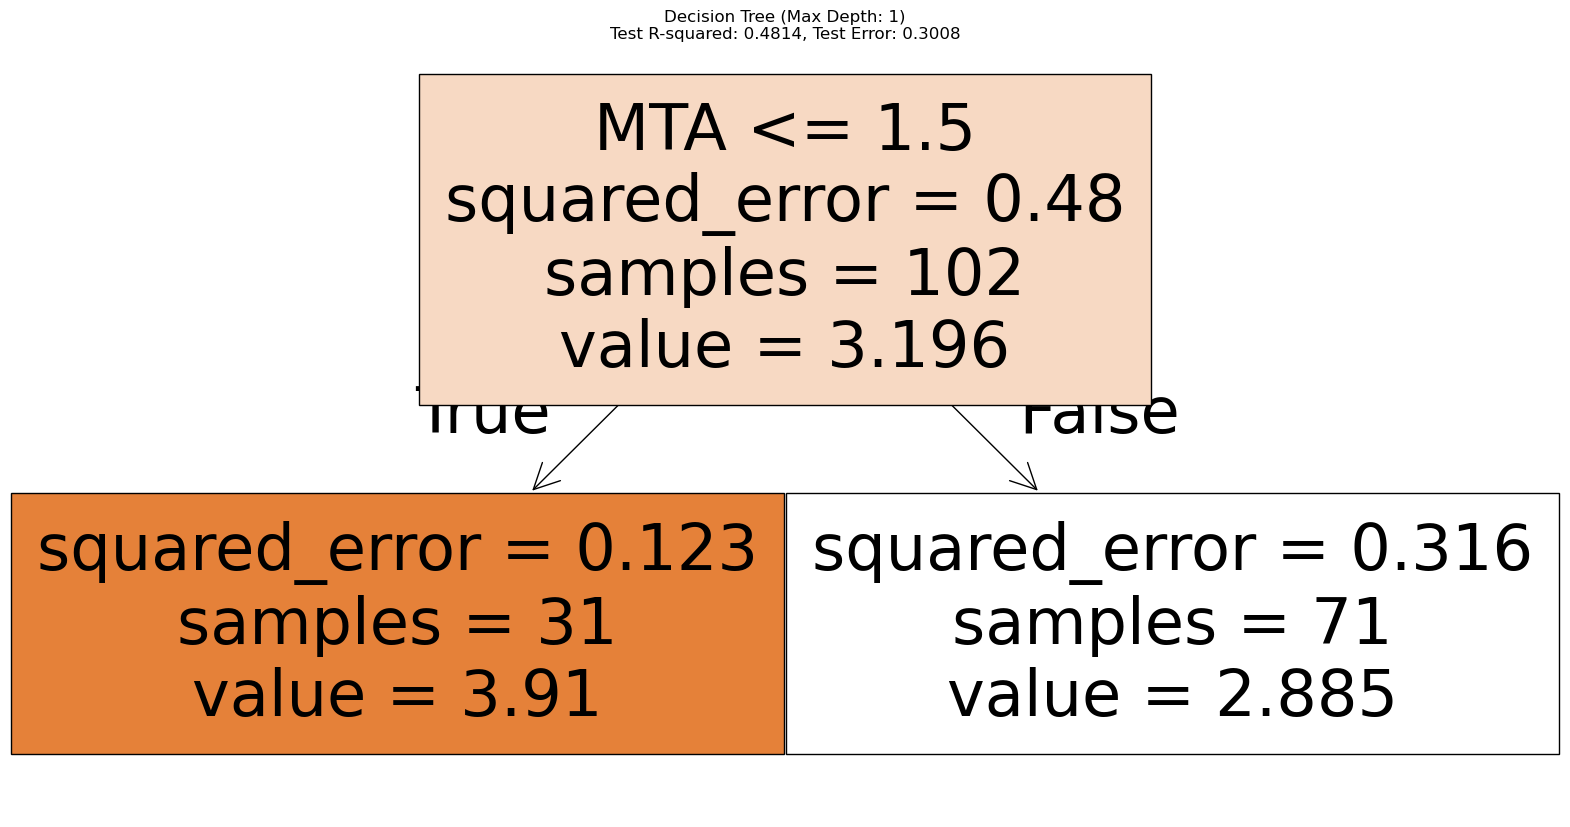

Top 11 important features saved to top_11_features_max_depth_1.txt
Plotting tree for max_depth=2


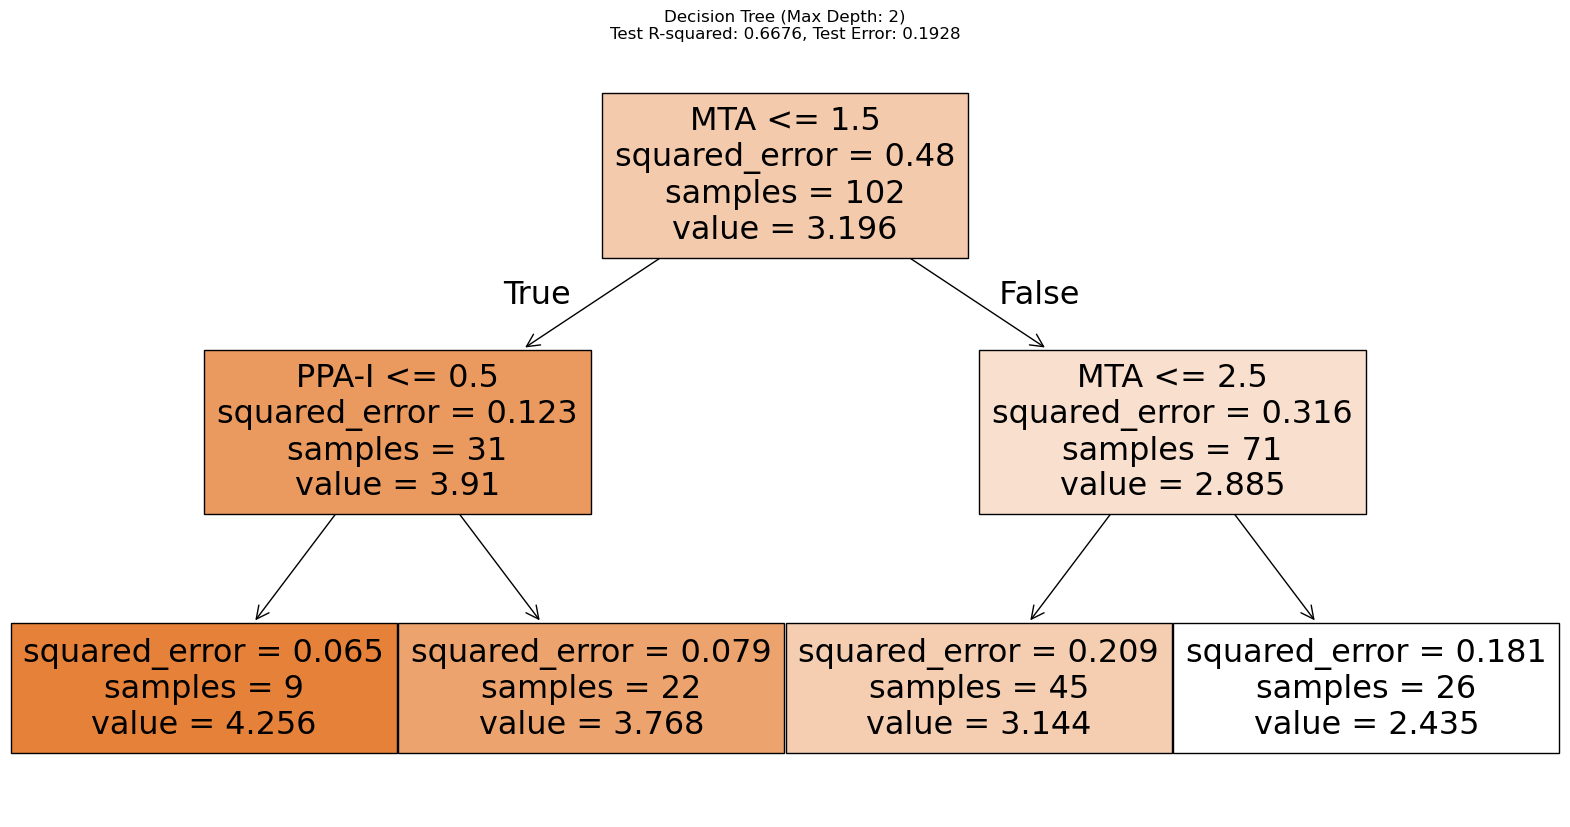

Top 11 important features saved to top_11_features_max_depth_2.txt
Plotting tree for max_depth=3


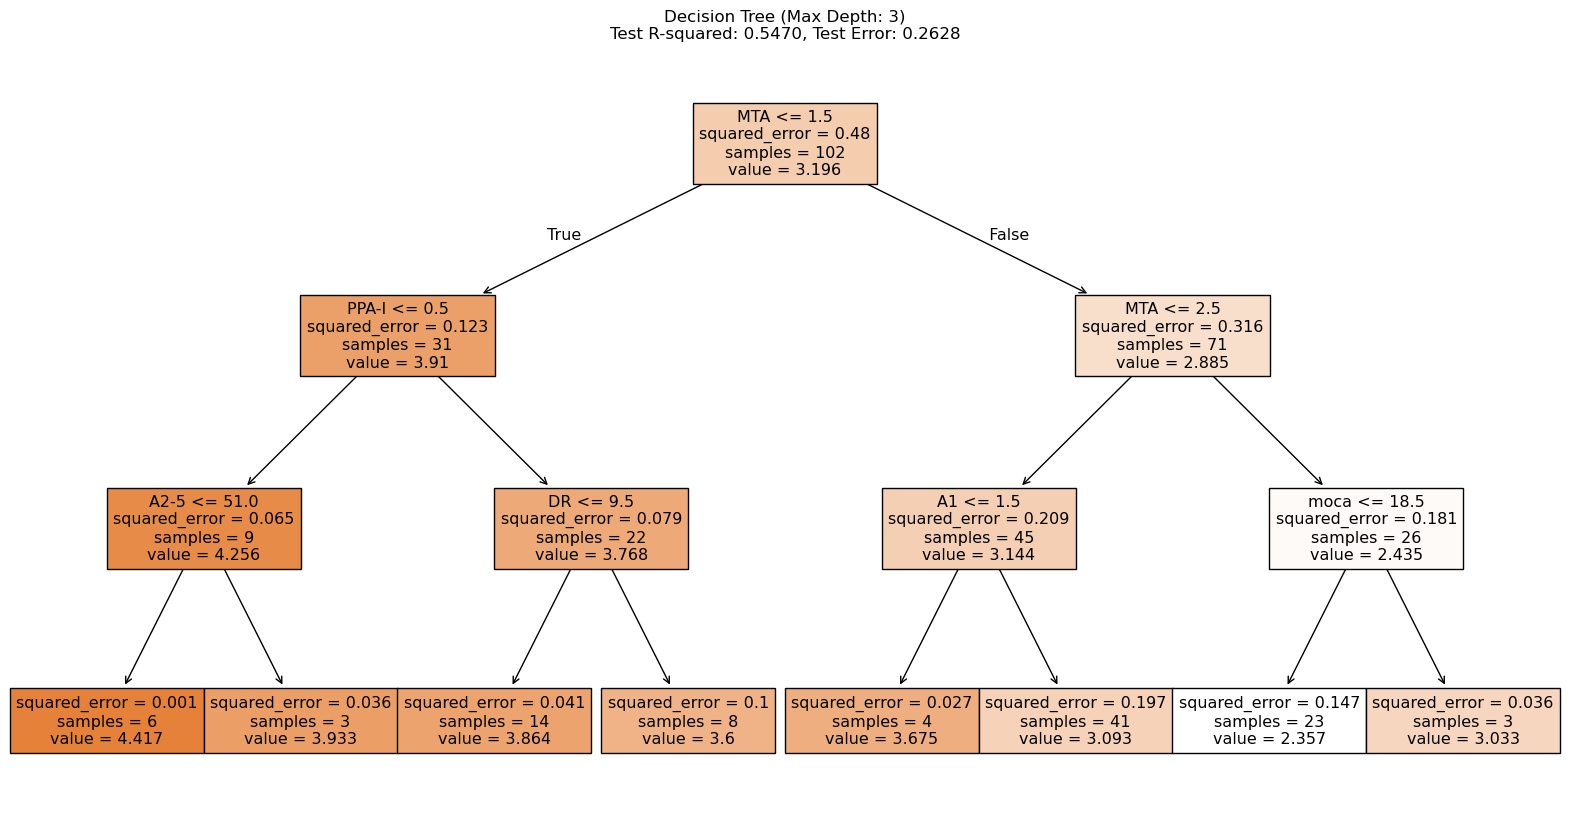

Top 11 important features saved to top_11_features_max_depth_3.txt
Plotting tree for max_depth=4


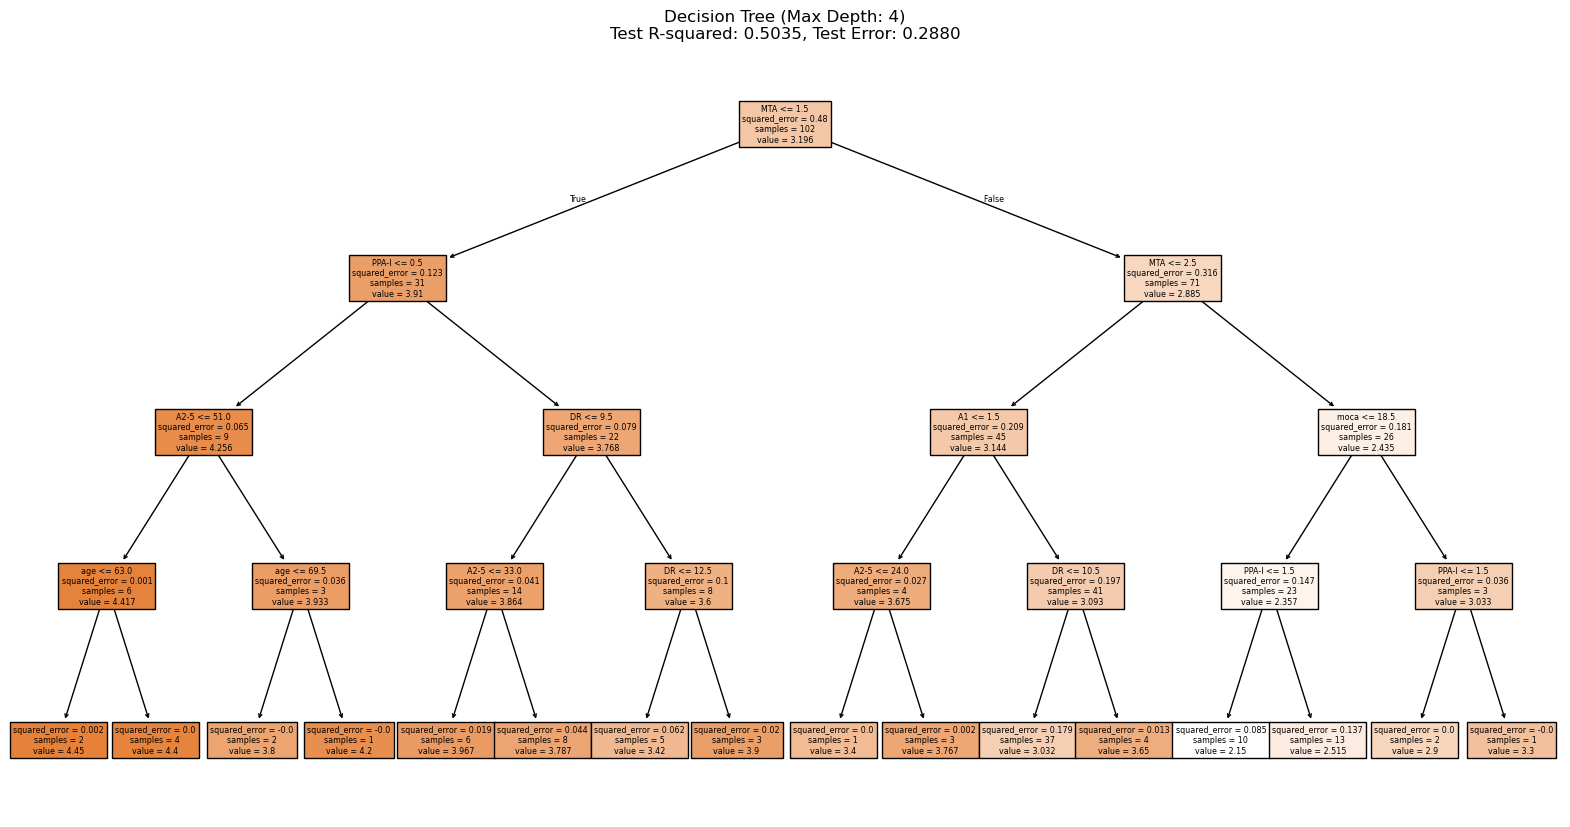

Top 11 important features saved to top_11_features_max_depth_4.txt
Plotting tree for max_depth=5


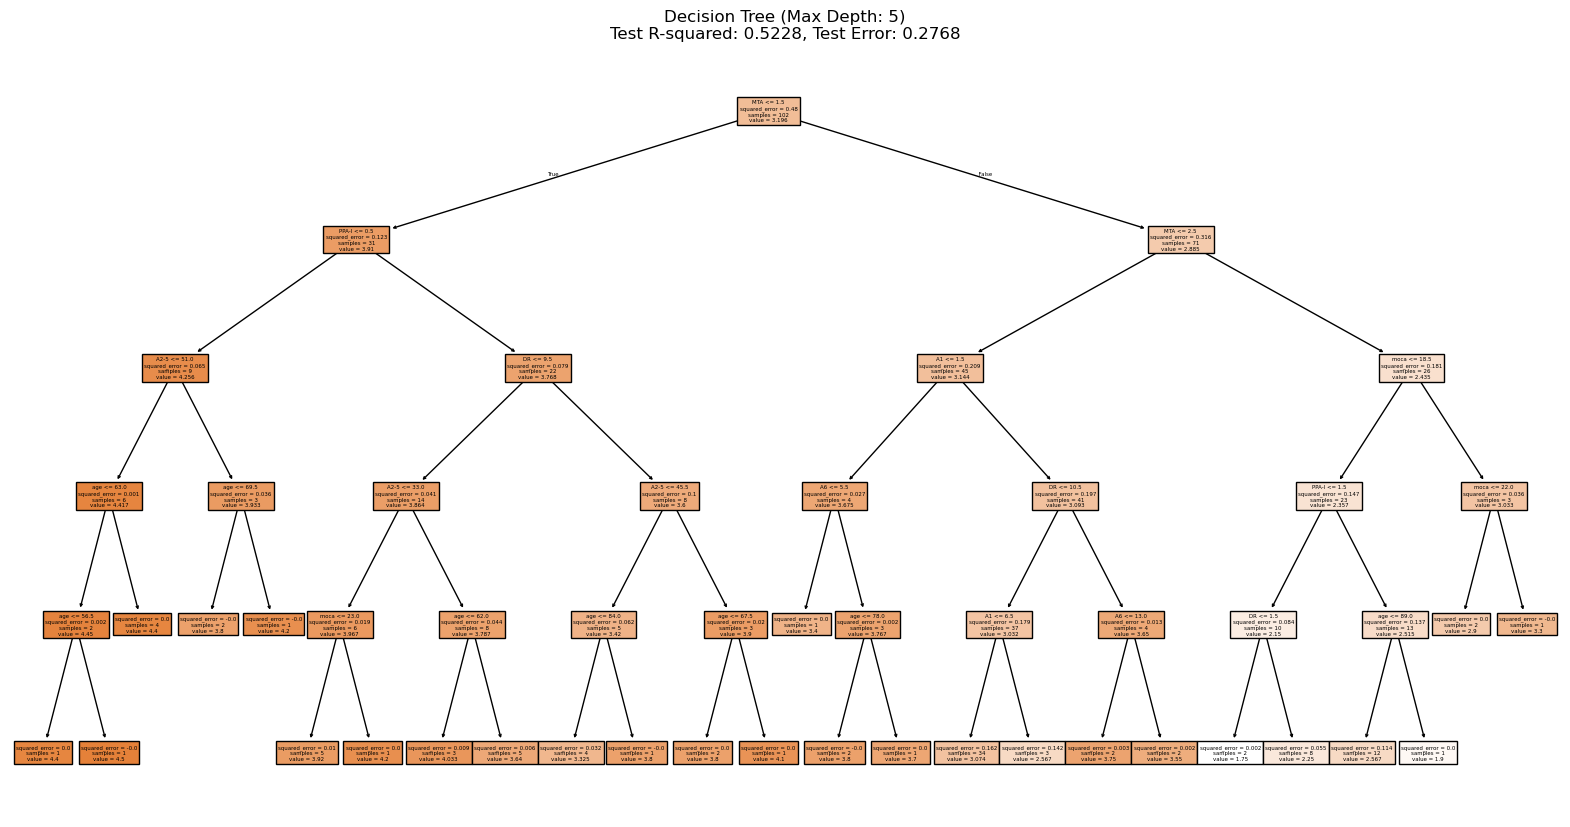

Top 11 important features saved to top_11_features_max_depth_5.txt
Plotting tree for max_depth=6


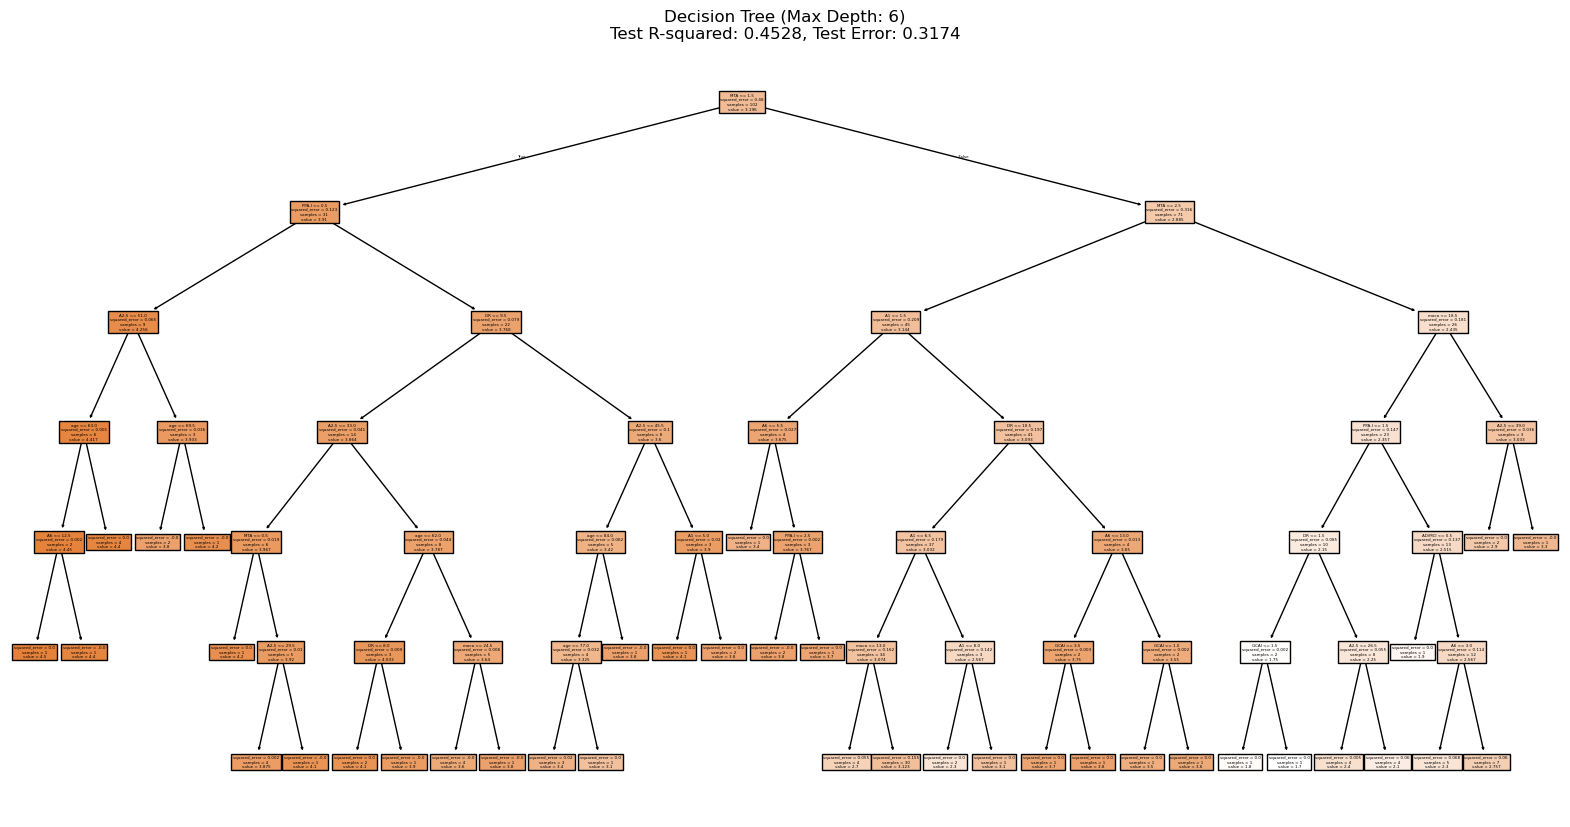

Top 11 important features saved to top_11_features_max_depth_6.txt
Plotting tree for max_depth=7


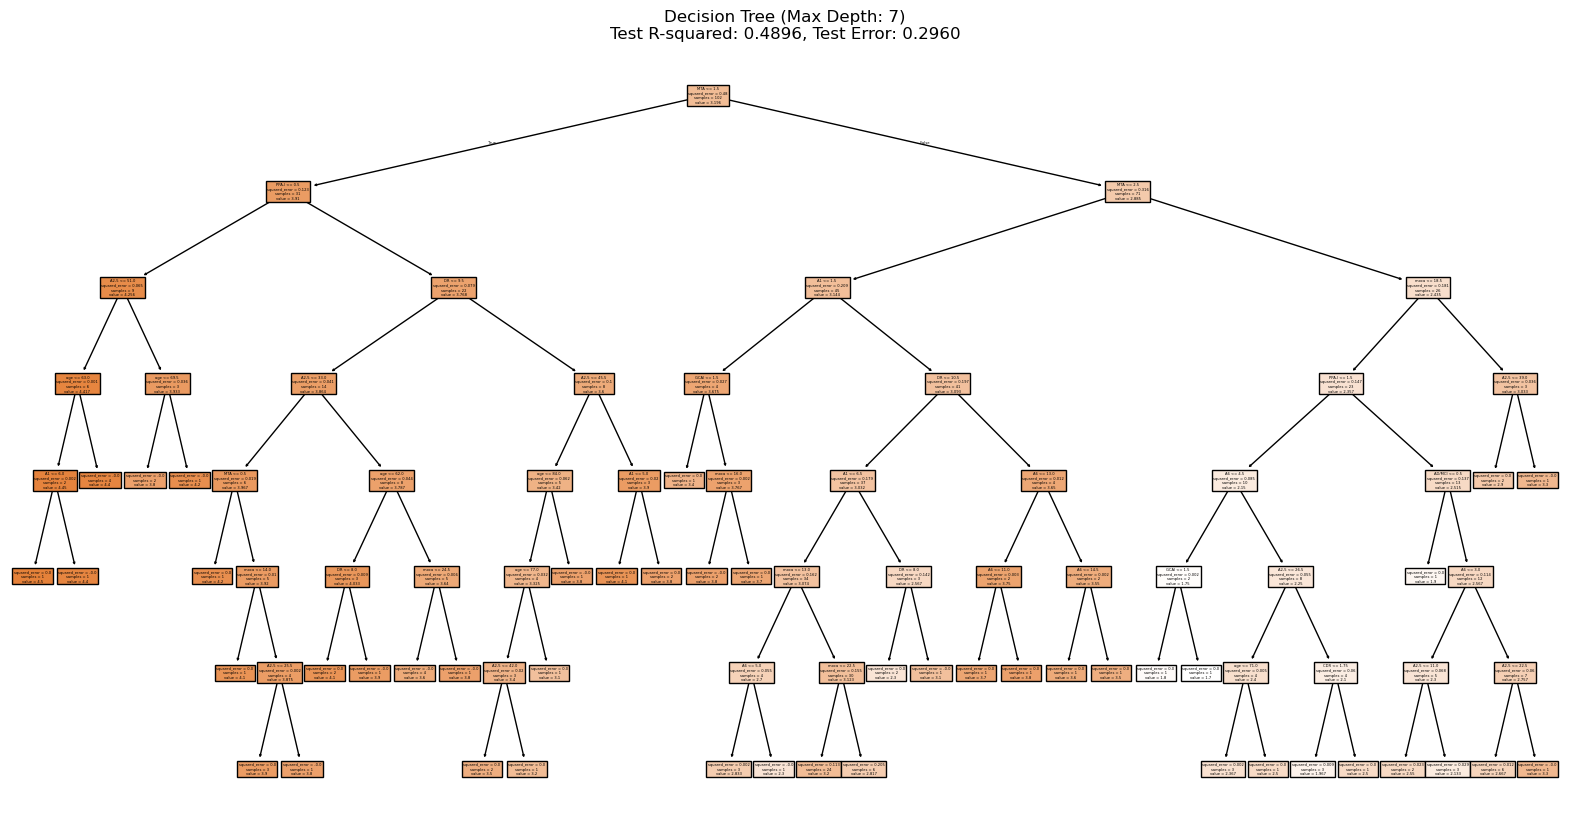

Top 11 important features saved to top_11_features_max_depth_7.txt
Plotting tree for max_depth=8


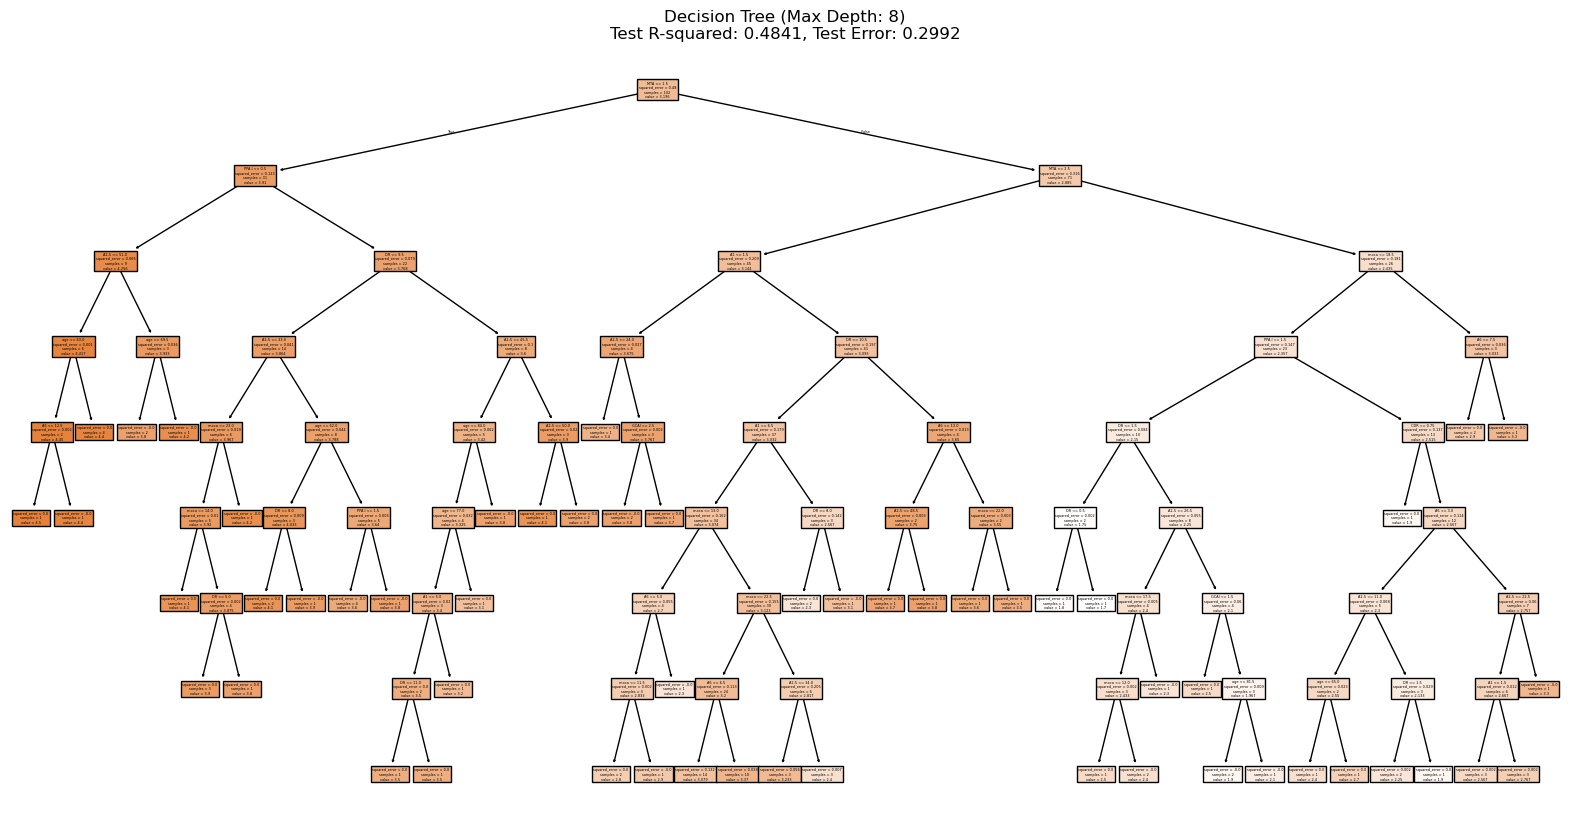

Top 11 important features saved to top_11_features_max_depth_8.txt
Plotting tree for max_depth=9


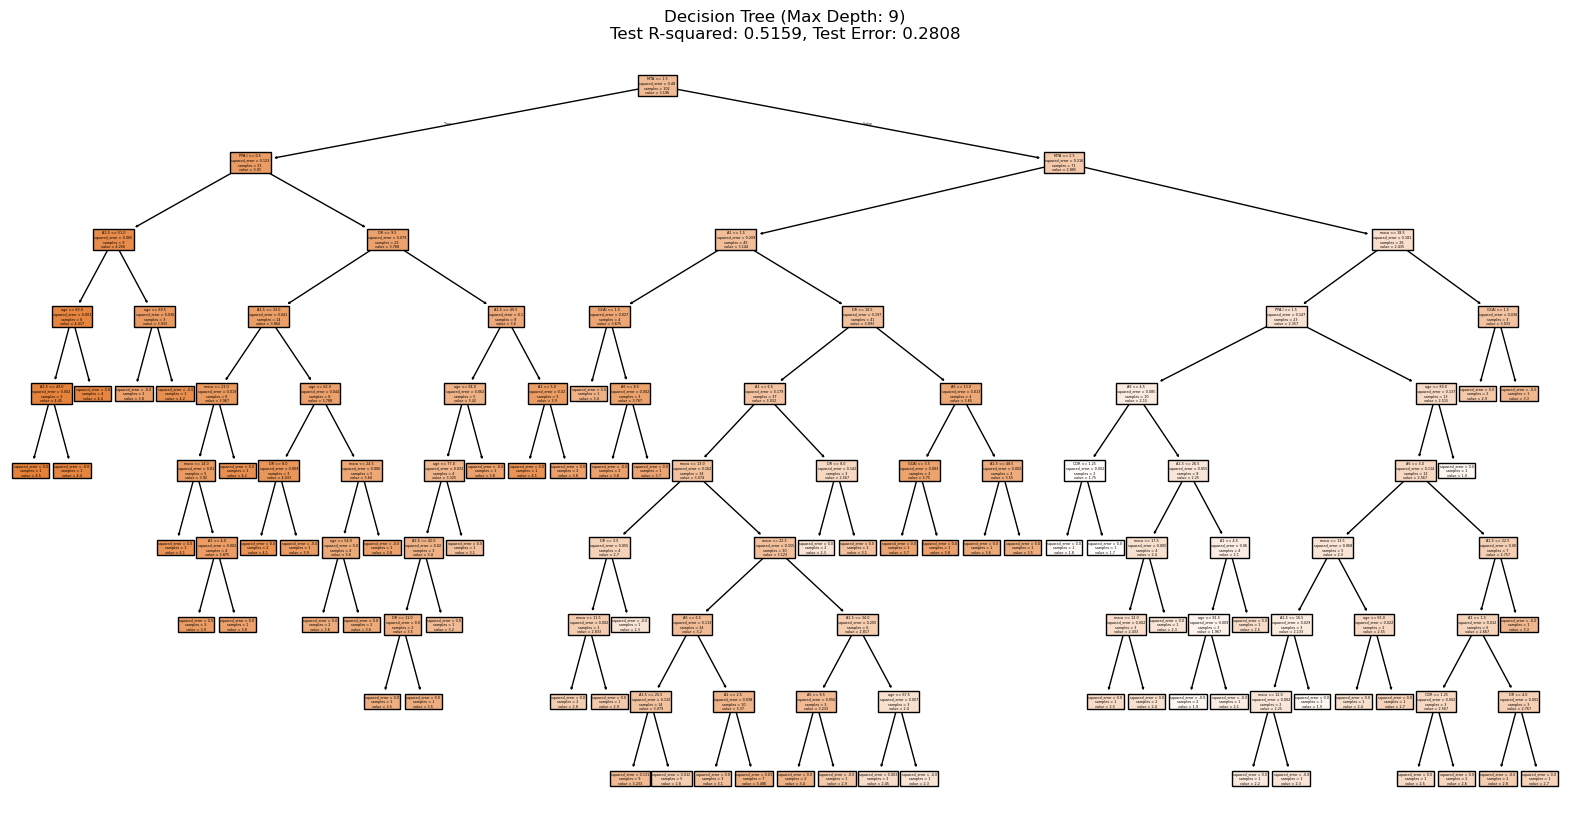

Top 11 important features saved to top_11_features_max_depth_9.txt
Plotting tree for max_depth=10


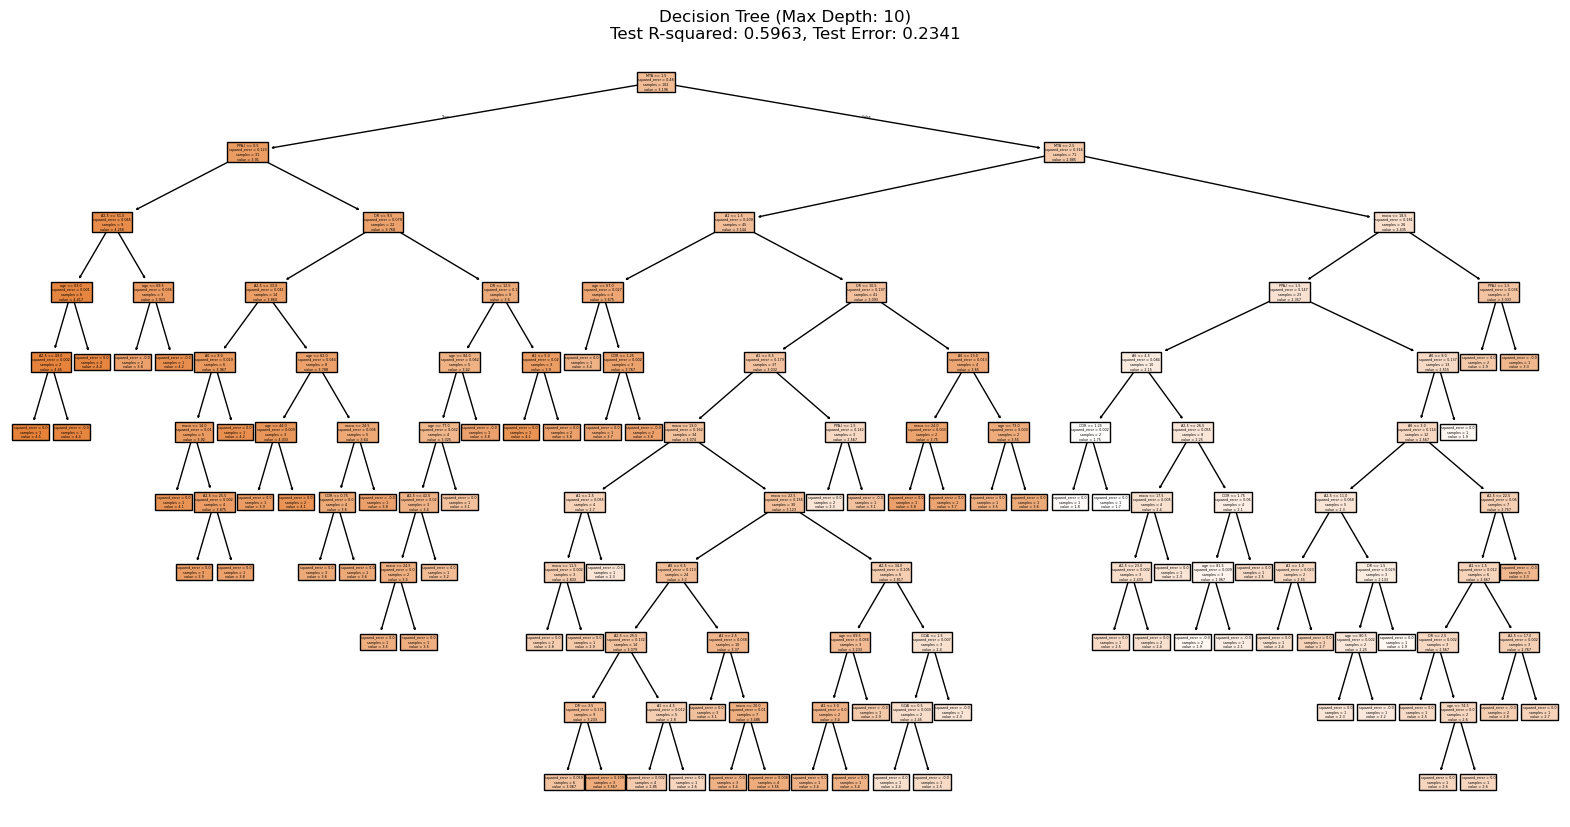

Top 11 important features saved to top_11_features_max_depth_10.txt


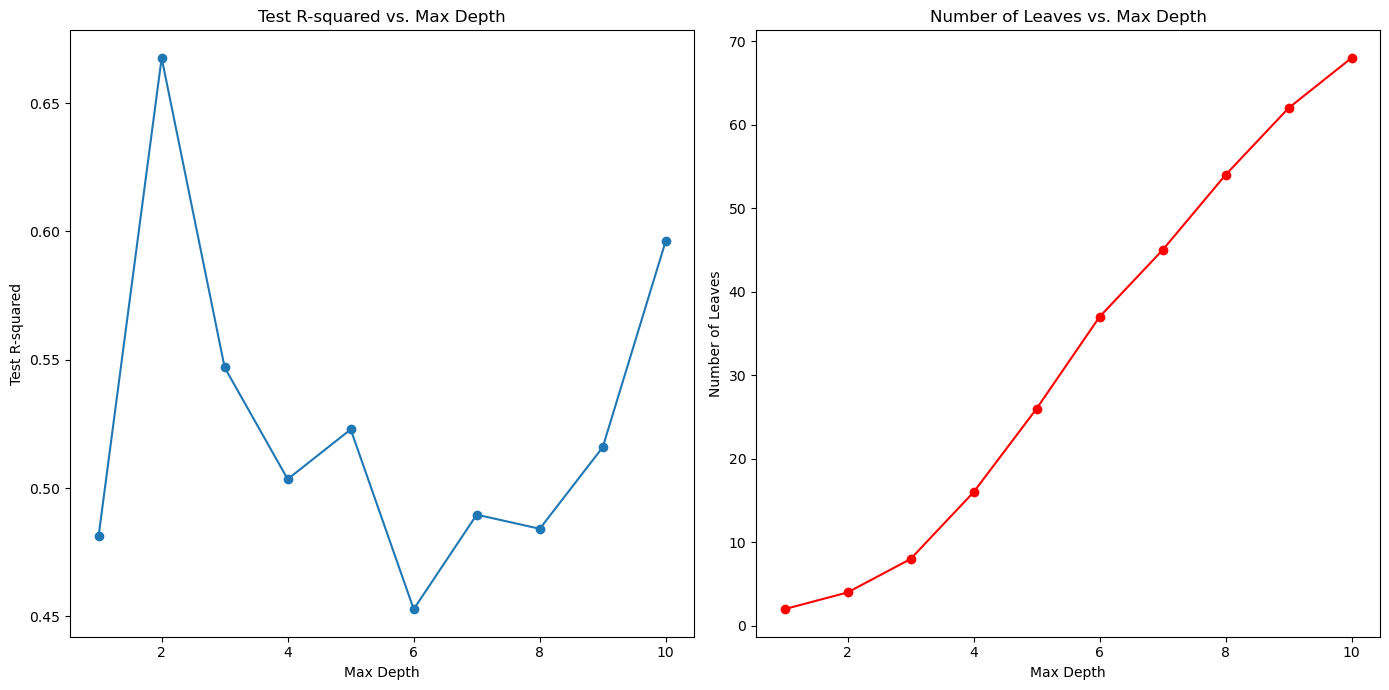

In [6]:
dt_analysis.train_and_plot_metrics(df_cleaned, max_depth_x=10)

In [7]:
from DecisionTreeAnalysis import RandomForestAnalysis

target = 'R-hyppo'
rf_analysis = RandomForestAnalysis(features, target, max_depth=3)
rf_analysis.train(df_cleaned)
rf_analysis.plot_tree(max_depth=3)
rf_analysis.print_most_important_features(top_x=3)

ImportError: cannot import name 'RandomForestAnalysis' from 'DecisionTreeAnalysis' (c:\Users\Amir\Documents\Alzheimer\DecisionTreeAnalysis.py)

In [ ]:
rf_analysis.train_and_plot_metrics(df_cleaned, max_depth_x=10)